# PS4 Games Sales Analysis Report

### Objective

##### The primary goal of this analysis is to explore and extract valuable insights from the sales data of PS4 games. This includes understanding global and regional sales trends, identifying top-performing games, genres, and publishers, and visualizing key patterns in the data. Specifically, the objectives are:

- Identify the top 5 best-selling games globally.
- Compare regional sales (North America, Europe, Japan, and Rest of the World) for each    genre to understand market preferences.
- Find the publisher with the highest total global sales.
- Analyze the year with the highest number of game releases.
- Determine the most popular genre globally based on total sales.
- Identify the game with the highest sales in Japan compared to other regions.
- Examine if there is a correlation between sales in North America and Europe.
- Compare the sales growth trend for "Action" and "Shooter" genres over the years.
- Identify the top publisher in terms of sales for each region.
- Visualize the distribution of global sales to identify patterns and outliers.



### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

### Load the dataset

In [2]:
df = pd.read_csv('PS4_GamesSales.csv', encoding='unicode_escape')

### Display the first five rows of the dataset


In [3]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


### Check for missing values

In [4]:
print("\nMissing values before handling:")
missing_values = df.isnull().sum()
missing_values


Missing values before handling:


Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

### Handle missing values




In [5]:
df['Publisher'].fillna('Unknown', inplace=True)
df['Year'].fillna(df['Year'].median(), inplace=True)

### Convert 'Year' column to integer

In [6]:
df['Year'] = df['Year'].astype(int)

### Recheck missing values


In [7]:
print("\nMissing values after handling:")
missing_values_after = df.isnull().sum()
print(missing_values_after)


Missing values after handling:
Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64


### Check for duplicate rows

In [8]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


### Remove outliers using IQR

In [9]:
sales_columns = ['North America', 'Europe', 'Japan', 'Rest of World', 'Global']
Q1 = df[sales_columns].quantile(0.25)
Q3 = df[sales_columns].quantile(0.75)
IQR = Q3 - Q1

### Filter the dataset to remove outliers

In [10]:
df_filtered = df[~((df[sales_columns] < (Q1 - 1.5 * IQR)) | (df[sales_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"\nNumber of rows after removing outliers: {df_filtered.shape[0]}")
print(f"Final shape of the dataset: {df_filtered.shape}")


Number of rows after removing outliers: 793
Final shape of the dataset: (793, 9)


### Validate the cleaned data


In [11]:
print("\nDataset after cleaning:")
df_filtered.head()



Dataset after cleaning:


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
178,The LEGO Movie Videogame,2014,Action-Adventure,Warner Bros. Interactive Entertainment,0.26,0.32,0.01,0.11,0.71
183,METRO 2033,2014,Shooter,Deep Silver,0.22,0.31,0.05,0.10,0.68
186,Plants vs Zombies: Garden Warfare,2014,Shooter,Electronic Arts,0.24,0.30,0.01,0.11,0.66
191,Plants vs. Zombies: Garden Warfare 2,2016,Shooter,Electronic Arts,0.22,0.31,0.00,0.10,0.63
197,L.A. Noire,2017,Adventure,Rockstar Games,0.18,0.32,0.00,0.10,0.60


## 1. Top 5 Best-Selling Games Globally 
 This list showcases the top-selling games globally, providing insights into successful titles that could guide future development strategies.

In [12]:
top_5_games = df_filtered.nlargest(5, 'Global', keep='all')
print("\nTop 5 Best-Selling Games Globally:")
top_5_games[['Game', 'Global']]


Top 5 Best-Selling Games Globally:


,Game,Global
178,The LEGO Movie Videogame,0.71
183,METRO 2033,0.68
186,Plants vs Zombies: Garden Warfare,0.66
191,Plants vs. Zombies: Garden Warfare 2,0.63
197,L.A. Noire,0.60


## 2. Regional Sales Comparison by Genre
Game genre preferences vary by region, with North America and Europe favoring "Action" and "Shooter" genres, while Japan leans towards "Role-Playing" games, highlighting the need for market-specific strategies.

In [13]:
regional_sales_by_genre = df_filtered.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
print("\nRegional Sales by Genre:")
regional_sales_by_genre


Regional Sales by Genre:


,North America,Europe,Japan,Rest of World
Genre,,,,
Action,6.33,4.38,1.68,2.20
Action-Adventure,1.50,1.43,0.28,0.60
Adventure,2.30,1.65,0.43,0.81
Fighting,1.07,0.62,0.66,0.32
MMO,0.23,0.24,0.12,0.10
Misc,1.18,0.78,0.37,0.40
Music,1.09,0.90,0.08,0.42
Party,0.04,0.00,0.00,0.01
Platform,1.80,1.82,0.10,0.72


## 3. Publisher with the Highest Global Sales
Activision leads the gaming industry in global sales, emphasizing its significant influence and market dominance.

In [14]:

publisher_global_sales = df_filtered.groupby('Publisher')['Global'].sum().sort_values(ascending=False)
top_publisher = publisher_global_sales.idxmax()
print(f"\nPublisher with Highest Total Global Sales: {top_publisher} with sales {publisher_global_sales[top_publisher]}")



Publisher with Highest Total Global Sales: Activision with sales 4.87


## 4. Year with the Highest Number of Game Releases
2016 saw a peak in game releases, indicating a high point in the PS4 market’s activity during that year.

In [15]:
games_per_year = df_filtered['Year'].value_counts().sort_values(ascending=False)
top_year = games_per_year.idxmax()
print(f"\nYear with the Highest Number of Game Releases: {top_year} ({games_per_year[top_year]} games)")


Year with the Highest Number of Game Releases: 2016 (365 games)


## 5. Most Popular Genre Globally by Total Sales
The "Action" genre is the most popular globally, underscoring its broad appeal across diverse markets.

In [16]:
genre_global_sales = df_filtered.groupby('Genre')['Global'].sum().sort_values(ascending=False)
popular_genre = genre_global_sales.idxmax()
print(f"\nMost Popular Genre Globally: {popular_genre} with sales {genre_global_sales[popular_genre]}")


Most Popular Genre Globally: Action with sales 14.72


## 6. Game with the Highest Sales in Japan Compared to Other Regions
Games like Resident Evil Zero and Disgaea 5 performed strongly in Japan, revealing regional preferences for niche genres.

In [17]:
highest_japan_game = df_filtered.nlargest(1, 'Japan', keep='all')
print("\nGame with the Highest Sales in Japan Compared to Other Regions:")
highest_japan_game[['Game', 'Japan', 'North America', 'Europe', 'Rest of World', 'Global']]



Game with the Highest Sales in Japan Compared to Other Regions:


,Game,Japan,North America,Europe,Rest of World,Global
252,Resident Evil Zero,0.07,0.07,0.18,0.05,0.37
259,Disgaea 5: Alliance of Vengeance,0.07,0.15,0.08,0.05,0.35
298,New Danganronpa V3: Minna no Koroshiai Shin Gakki,0.07,0.09,0.05,0.03,0.25
367,Valkyria: Azure Revolution,0.07,0.04,0.03,0.02,0.16
373,Atelier Sophie: The Alchemist of the Mysteriou...,0.07,0.04,0.03,0.01,0.15
380,Yonmegami Online: Cyber Dimension Neptune,0.07,0.06,0.00,0.01,0.14
386,Guilty Gear Xrd -Revelator-,0.07,0.06,0.00,0.01,0.14
393,Samurai Warriors 4-II,0.07,0.04,0.02,0.01,0.13
402,Utawarerumono: Futari no Hakuoro,0.07,0.05,0.00,0.01,0.13
404,Utawarerumono: Itsuwari no Kamen,0.07,0.05,0.00,0.01,0.13


## 7. Correlation Between Sales in North America and Europe
The strong positive correlation (0.66) between sales in North America and Europe suggests that consumer behaviors in these regions are similar, supporting unified marketing strategies.

In [18]:
sales_correlation = df_filtered[['North America', 'Europe']].corr()
print("\nCorrelation between Sales in North America and Europe:")
sales_correlation



Correlation between Sales in North America and Europe:


,North America,Europe
North America,1.000000,0.664908
Europe,0.664908,1.000000


## 8. Sales Growth Trend for Action and Shooter Genres
The "Action" genre maintained consistent high sales, while "Shooter" genre sales fluctuated, suggesting that action games are more stable in the market.

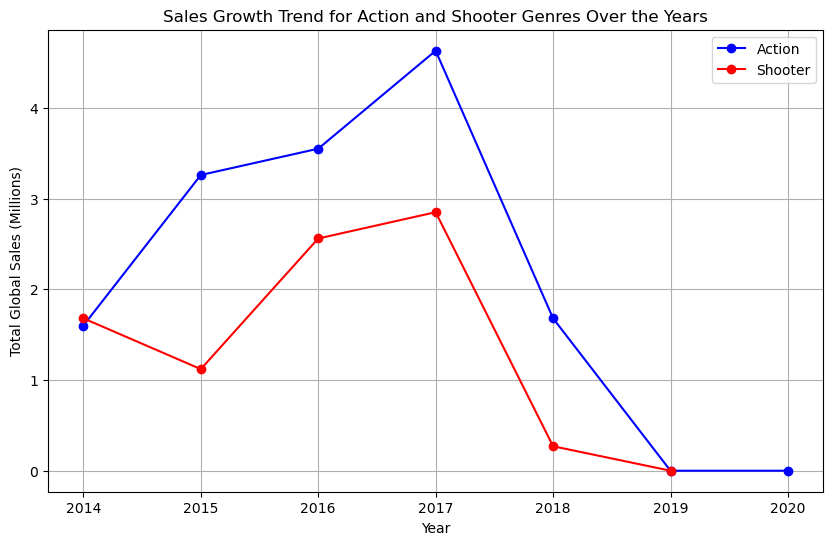

In [19]:
action_sales = df_filtered[df_filtered['Genre'] == 'Action'].groupby('Year')['Global'].sum()
shooter_sales = df_filtered[df_filtered['Genre'] == 'Shooter'].groupby('Year')['Global'].sum()

plt.figure(figsize=(10, 6))
plt.plot(action_sales.index, action_sales.values, label='Action', color='blue', marker='o')
plt.plot(shooter_sales.index, shooter_sales.values, label='Shooter', color='red', marker='o')
plt.title('Sales Growth Trend for Action and Shooter Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.legend()
plt.grid(True)
plt.show()


## 9. Top Publisher in Sales for Each Region
Activision leads in most regions, while Tecmo Koei stands out in Japan, highlighting regional differences in publisher dominance.

In [20]:
top_publishers_by_region = df_filtered.groupby('Publisher')[['North America', 'Europe', 'Japan', 'Rest of World']].sum().idxmax()
print("\nTop Publisher in Terms of Sales for Each Region:")
top_publishers_by_region


Top Publisher in Terms of Sales for Each Region:


North America    Activision
Europe           Activision
Japan            Tecmo Koei
Rest of World    Activision
dtype: object

## 10. Visualization of Global Sales Distribution

- Histogram of global sales distribution.

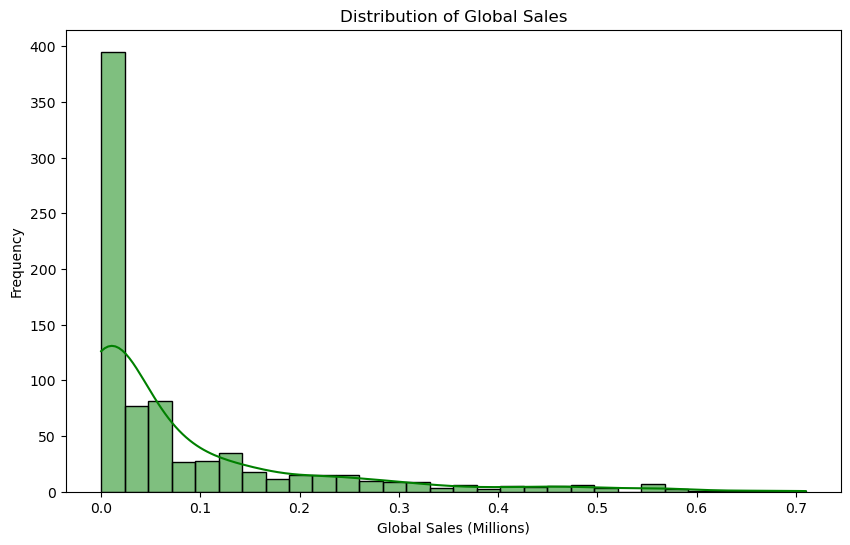

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Global'], kde=True, bins=30, color='green')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frequency')
plt.show()

- Bar chart comparing total sales by region.

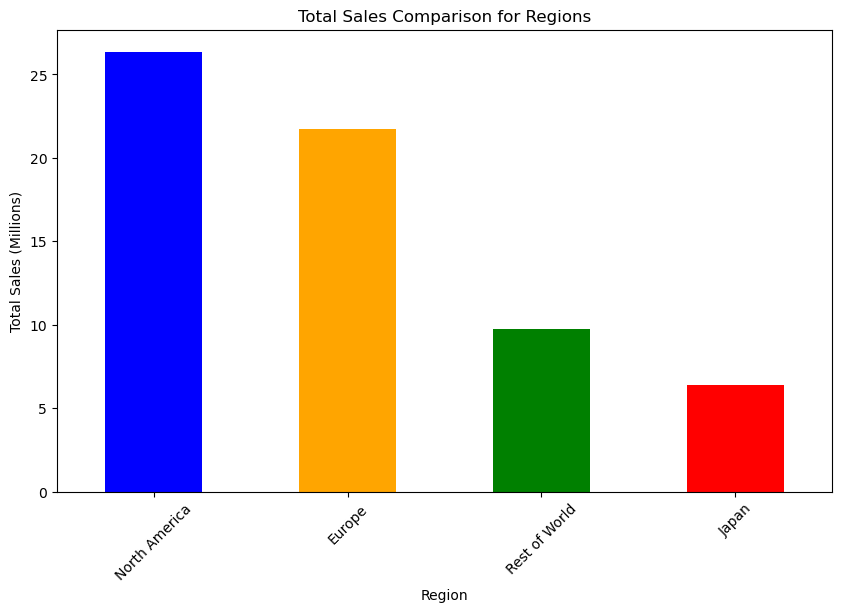

In [22]:
total_sales_by_region = df_filtered[['North America', 'Europe', 'Japan', 'Rest of World']].sum().sort_values(ascending=False)

# Plotting the bar chart
total_sales_by_region.plot(kind='bar', color=['blue', 'orange', 'green', 'red'], figsize=(10, 6))

# Adding title, labels, and rotating x-axis
plt.title('Total Sales Comparison for Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)

# Displaying the chart
plt.show()

- Pie chart for the share of global sales by genre.

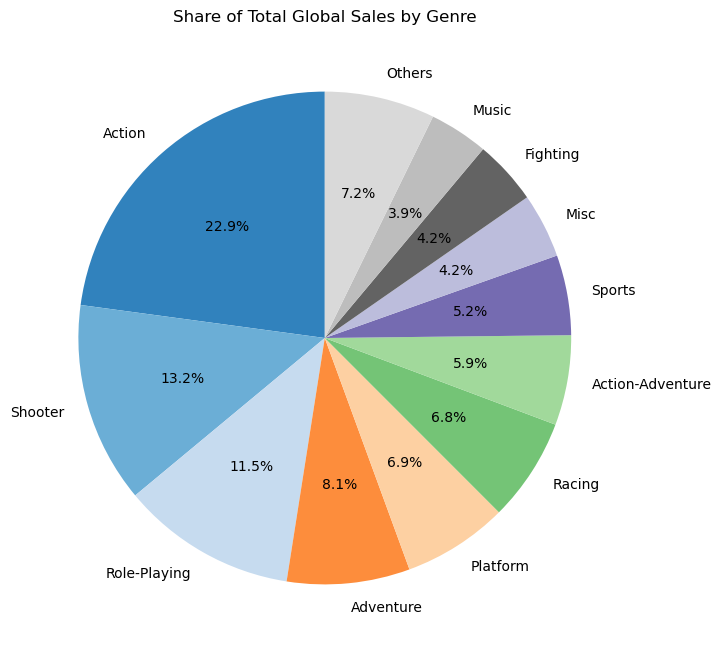

In [23]:
genre_sales_share = genre_global_sales / genre_global_sales.sum()

# Combine genres with sales less than 2.9% into 'Others'
threshold = 0.029  # 2.9%
filtered_genre_sales = genre_sales_share[genre_sales_share >= threshold]
other_sales = genre_sales_share[genre_sales_share < threshold].sum()

# Combine 'Others' with the filtered genres
filtered_genre_sales = pd.concat([filtered_genre_sales, pd.Series({'Others': other_sales})])

# Plot the pie chart
plt.figure(figsize=(8, 8))
filtered_genre_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20c')
plt.title('Share of Total Global Sales by Genre')
plt.ylabel('')
plt.show()


- Line chart for the trend of global sales over the years.

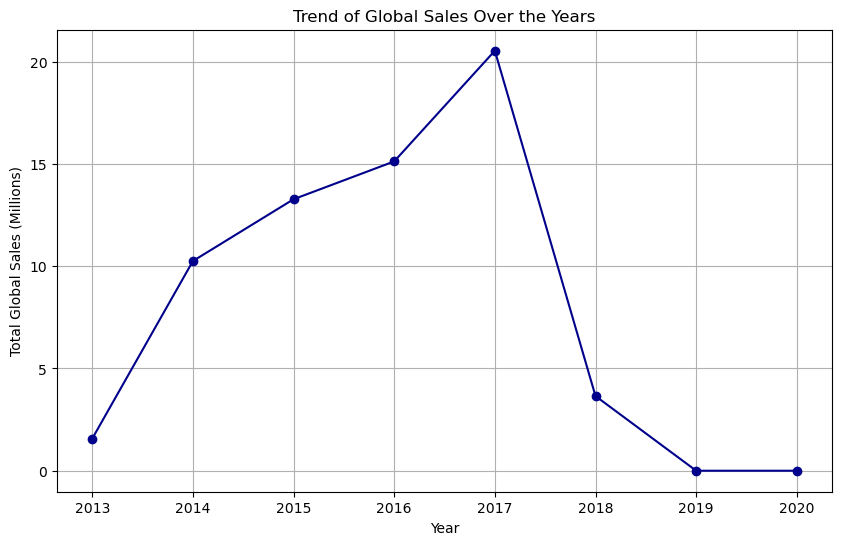

In [24]:
global_sales_trend = df_filtered.groupby('Year')['Global'].sum()
plt.figure(figsize=(10, 6))
plt.plot(global_sales_trend.index, global_sales_trend.values, marker='o', color='darkblue')
plt.title('Trend of Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.grid(True)
plt.show()

- Horizontal bar chart for the top 10 best-selling games globally.

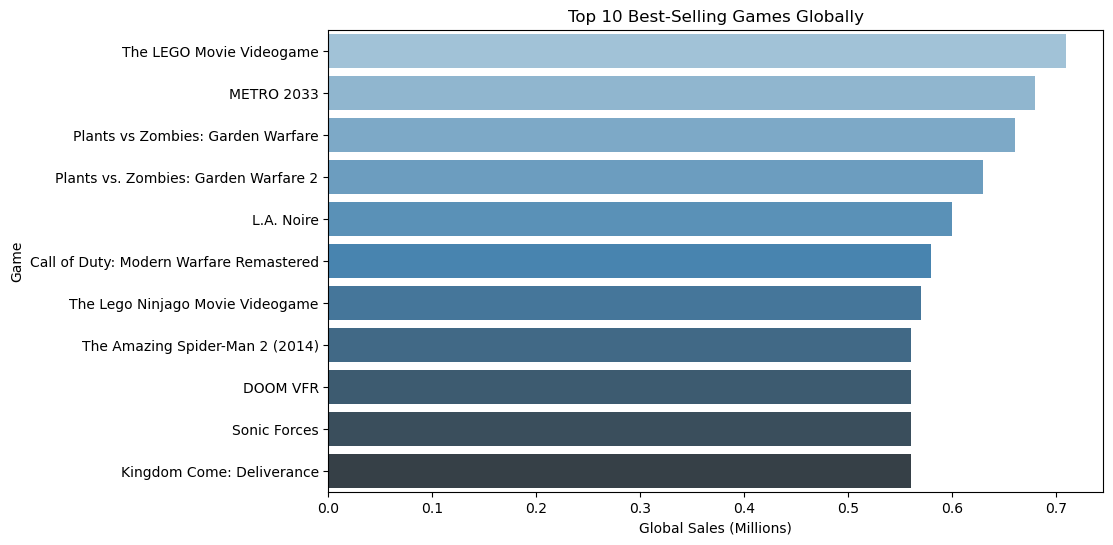

In [25]:
top_10_games = df_filtered.nlargest(10, 'Global', keep='all')
plt.figure(figsize=(10, 6))
sns.barplot(x='Global', y='Game', data=top_10_games, palette='Blues_d')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game')
plt.show()

- Heatmap for correlation between regional sales.

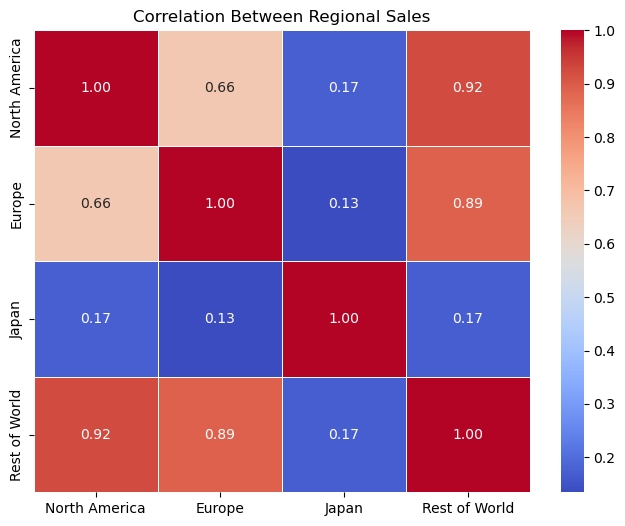

In [26]:
region_sales_corr = df_filtered[['North America', 'Europe', 'Japan', 'Rest of World']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(region_sales_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Regional Sales')
plt.show()

- Stacked bar chart showing genre contributions to regional sales.

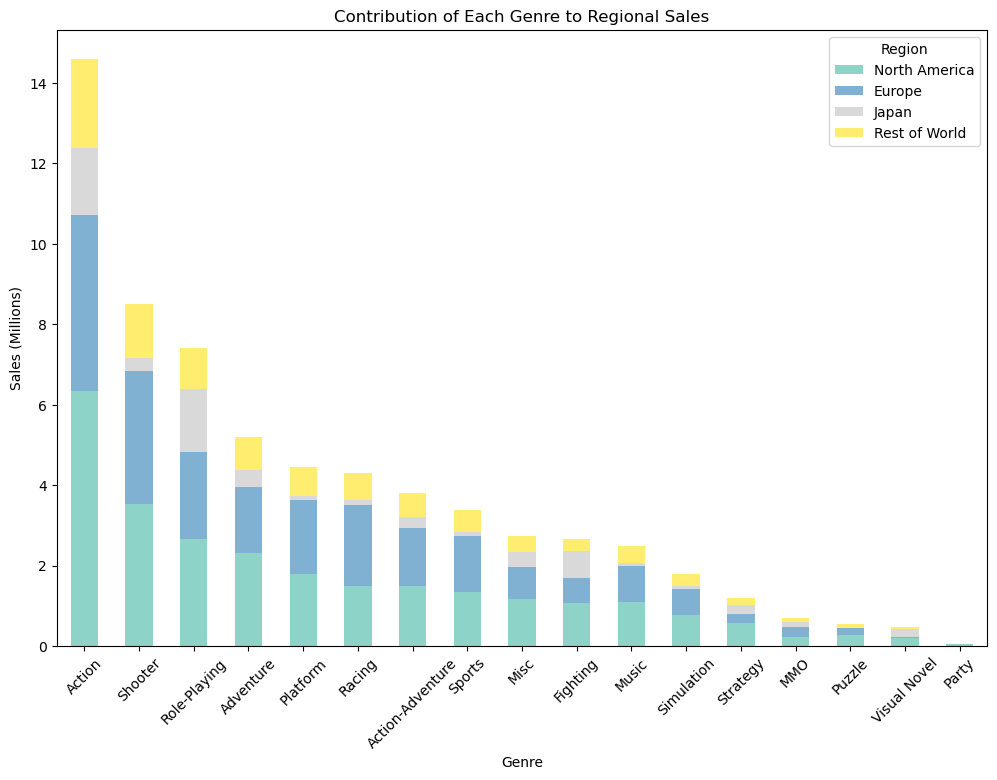

In [27]:
total_sales_by_genre = regional_sales_by_genre.sum(axis=1)

# Sort the genres in descending order of total sales
sorted_genres = total_sales_by_genre.sort_values(ascending=False).index

# Reorder the regional_sales_by_genre DataFrame based on the sorted genres
regional_sales_by_genre = regional_sales_by_genre.loc[sorted_genres]

# Plot the stacked bar chart
regional_sales_by_genre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3')
plt.title('Contribution of Each Genre to Regional Sales')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


# Reflections



## 1. Insights and Patterns

- The "Action" genre dominated global sales, while "Role-Playing" games performed exceptionally well in Japan.
- Activision’s dominance in most regions highlights its strong global presence.
  
## 2. Surprises in the Data

- Japan’s unique preferences for "Role-Playing" and niche genres stood out.
- The strong correlation between North America and Europe sales indicates similar consumer behavior.

## 3. Challenges and Solutions

- Missing Values: Addressed by using median imputation for "Year" and "Unknown" for "Publisher."
- Outliers: Managed through the Interquartile Range (IQR) method.

## 4. Real-World Applications
- Insights can guide publishers in targeting specific regions with preferred genres.
- Developers can focus on trends such as the popularity of "Action" and "Shooter" games.

## 5. Skills and Knowledge Improved
- Improved data cleaning and preprocessing skills.
- Enhanced visualization techniques using Seaborn and Matplotlib.
- Better understanding of correlation and sales trend analysis.

# Conclusion
This analysis provided a comprehensive exploration of PS4 game sales, uncovering valuable insights into global and regional trends, popular genres, and publisher performance. These findings can inform strategic decision-making for game publishers and developers, helping them better understand market dynamics and consumer preferences.

